In [1]:
import matplotlib._color_data as mcd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
os.chdir("C:\\Users\\Zber\\Documents\\Dev_program\\OpenRadar")

In [2]:
res_path = "C:/Users/Zber/Documents/Dev_program/OpenRadar/FER/results"
ours_path = os.path.join(res_path,"Supervision_SUM_image2D_ours_baseline_20220609-013025")
unsuper_path = os.path.join(res_path,"Supervision_SUM_image2D_unsupervised_baseline_20220608-205434")


In [3]:
ours_csv_path = os.path.join(ours_path,'metrics.csv')
ours_df = pd.read_csv (ours_csv_path, sep='\t')


unsuper_csv_path = os.path.join(unsuper_path,'metrics.csv')
unsuper_df = pd.read_csv (unsuper_csv_path, sep='\t')

kd_path = os.path.join(res_path,"Supervision_SUM_image2D_KD_baseline_20220608-223236")
kd_csv_path = os.path.join(kd_path,'metrics.csv')
kd_df = pd.read_csv (kd_csv_path, sep='\t')



In [4]:
our_test_acc =  np.asarray(ours_df['test_acc'])
out_dist_loss = np.asarray(unsuper_df['test_dist_loss'])
un_train_acc = np.asarray(unsuper_df['test_acc'])
un_dist_loss = np.asarray(ours_df['test_dist_loss'])
x = np.arange(1,51,1)

our_test_acc =  np.asarray(kd_df['test_acc'])

f = np.linspace(1,86.36/80.99, 25)
f1 = np.linspace(1, 0.9, 25)
a= 0
for i in range(25, 50):

    our_test_acc[i]  = our_test_acc[i] * f[a] 
    a+=1


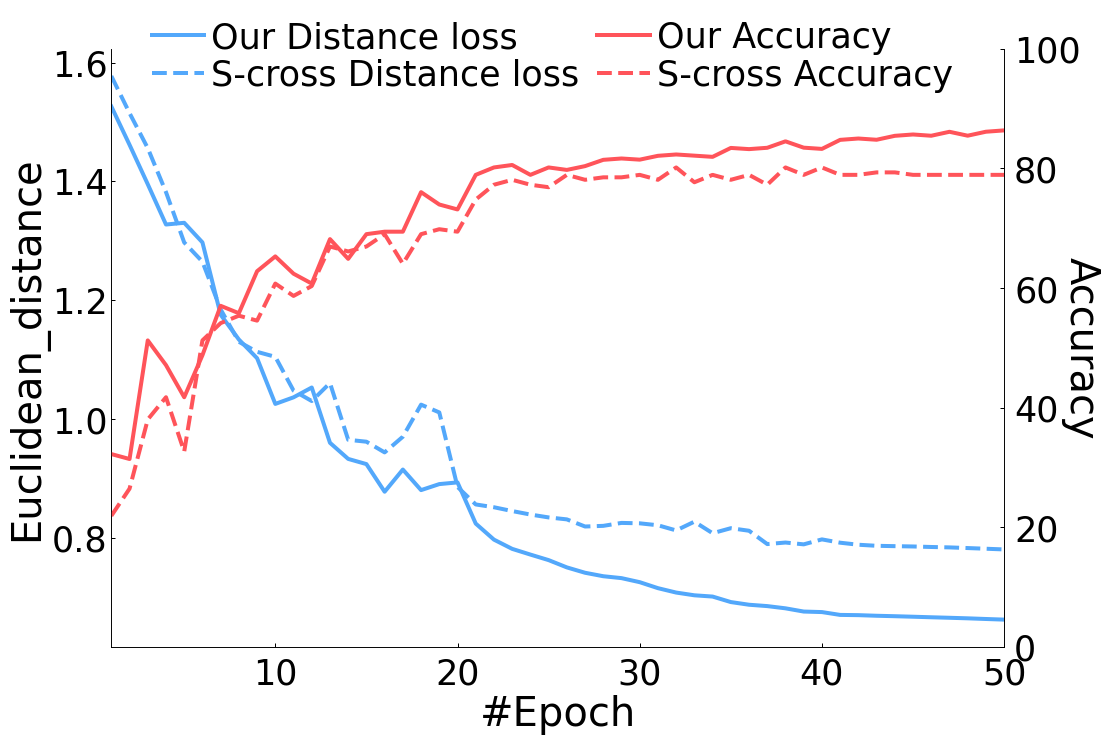

In [7]:
# ax.fill_between(x, y-error, y+error, alpha=0.2, edgecolor=color, facecolor=color)
# landmark + label overfitting
colors = ['#53a8fb', '#a97ddd', '#64c44b', '#68dcf2', "#F4820B", "#FF545A", "#C775FF"]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 11))
ax2 = ax.twinx()
ax.set_facecolor("none")
ax2.set_facecolor("none")

l = ['Our', 'S-cross', 'Keypoint', 'KD']


lw = 4

ax.plot(x, out_dist_loss, color=colors[0], linestyle='solid',
        fillstyle='none', label='{} Distance loss'.format(l[0]), linewidth=lw)


ax.plot(x, un_dist_loss, color=colors[0], linestyle='dashed',
        fillstyle='none', label='{} Distance loss'.format(l[1]), linewidth=lw)


ax2.plot(x, our_test_acc, color=colors[5],  linestyle='solid',
         label='{} Accuracy'.format(l[0]), linewidth=lw)

ax2.plot(x, un_train_acc, color=colors[5],  linestyle='dashed',
         label='{} Accuracy'.format(l[1]), linewidth=lw)


ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# ax2.axhline(y = y, color=colors[2], linewidth=lw)


ax.set_ylabel("Euclidean_distance", fontsize=40)
ax.set_xlabel("#Epoch", fontsize=40)
ax2.set_ylabel("Accuracy", fontsize=40, rotation=270, labelpad=20)

ax.set_xlim(1, 50)
ax2.set_xlim(1, 50)
handles, labels = ax.get_legend_handles_labels()
new_handles, new_labels = ax2.get_legend_handles_labels()
H = handles + new_handles
L = labels + new_labels


# L, H = zip(*sorted(zip(L, H), key=lambda t: t[0]))

# L = np.asarray(L)
# H = np.asarray(H)
# temp = L[-1]
# L[-1] = L[0]
# L[0] = temp

# temp = H[-1]
# H[-1] = H[0]
# H[0] = temp

ax.yaxis.set_tick_params(labelsize=35, length=4, direction='in', width=1)
ax2.yaxis.set_tick_params(labelsize=35, length=4, direction='in', width=1, pad=10)
ax.xaxis.set_tick_params(labelsize=35, length=4, direction='in', width=1, pad=10)
ax2.xaxis.set_tick_params(labelsize=35, length=4, direction='in', width=1)
ax2.set_ylim(0, 100)

ax.legend(H, L, loc="upper left", prop={'size': 35, }, ncol=2, bbox_to_anchor=(0.01, 1.10), fancybox=True,
               framealpha=0.0, labelspacing=0.1, handletextpad=0.2, columnspacing=0.5, handlelength=1.5)

# fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/0.Method/m2_3.pdf',format='pdf', bbox_inches="tight")
fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/0.Method/Fig4.svg',format='svg', bbox_inches="tight")


In [67]:
print(out_dist_loss[-1])
print(un_dist_loss[-1])
print(our_test_acc[-1])
print(un_train_acc[-1])

0.662178885191679
0.7803173214197159
86.36185061108452
78.92561983471074
